In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

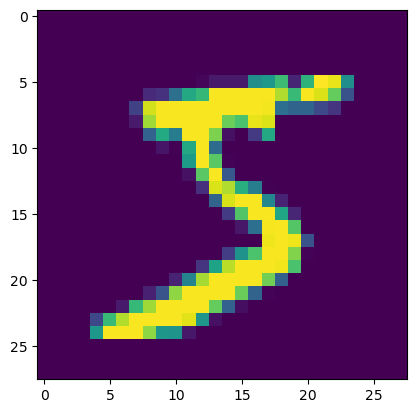

In [4]:
plt.imshow(X_train[0]);

In [5]:
y_train[0]

5

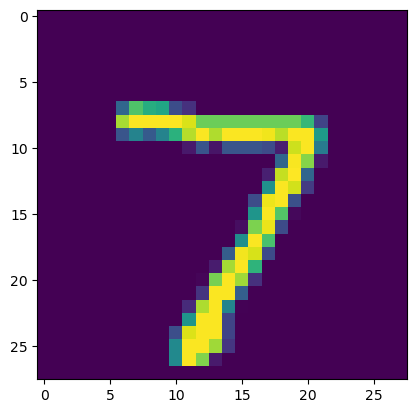

In [6]:
plt.imshow(X_test[0]);

In [7]:
y_test[0]

7

In [8]:
np.max(X_train), np.max(X_test), np.max(y_train), np.max(y_test)

(255, 255, 9, 9)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
np.max(X_train), np.max(X_test), np.max(y_train), np.max(y_test)

(1.0, 1.0, 9, 9)

In [11]:
model = Sequential(name='Handwritten')
model.add(Flatten(input_shape=(28, 28), name='L1'))
model.add(Dense(128, activation='relu', name='L2'))
model.add(Dense(32, activation='relu', name='L3'))
model.add(Dense(10, activation='softmax', name='L4'))

In [12]:
model.summary()

Model: "Handwritten"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Flatten)                (None, 784)               0         
                                                                 
 L2 (Dense)                  (None, 128)               100480    
                                                                 
 L3 (Dense)                  (None, 32)                4128      
                                                                 
 L4 (Dense)                  (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [14]:
hist = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2800 - accuracy: 0.9187 - val_loss: 0.1416 - val_accuracy: 0.9599
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1181 - accuracy: 0.9658 - val_loss: 0.1133 - val_accuracy: 0.9654
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0794 - accuracy: 0.9762 - val_loss: 0.1044 - val_accuracy: 0.9688
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0613 - accuracy: 0.9807 - val_loss: 0.0987 - val_accuracy: 0.9719
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0467 - accuracy: 0.9856 - val_loss: 0.1032 - val_accuracy: 0.9716
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0390 - accuracy: 0.9867 - val_loss: 0.0979 - val_accuracy: 0.9728
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0300 - accuracy: 0.9900 - val_loss: 0.0982 - val_accuracy:

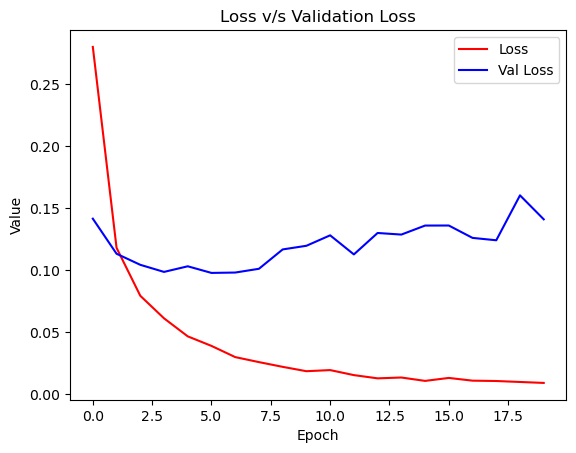

In [15]:
plt.plot(hist.history['loss'], 'r', label='Loss')
plt.plot(hist.history['val_loss'], 'b', label='Val Loss')
plt.legend(loc='upper right')
plt.title("Loss v/s Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.show()

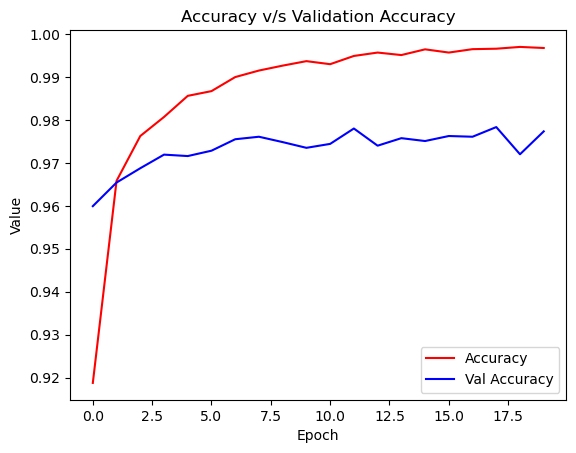

In [16]:
plt.plot(hist.history['accuracy'], 'r', label='Accuracy')
plt.plot(hist.history['val_accuracy'], 'b', label='Val Accuracy')
plt.legend(loc='lower right')
plt.title("Accuracy v/s Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.show()

In [17]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 644us/step


In [18]:
y_prob[0]

array([1.4915155e-13, 5.6963533e-15, 2.5124586e-13, 4.1513040e-10,
       1.1610320e-26, 5.6518889e-17, 3.6556552e-24, 1.0000000e+00,
       2.0707700e-15, 2.7091569e-11], dtype=float32)

In [19]:
y_pred = y_prob.argmax(axis=1)

In [20]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9775

In [22]:
X_test.shape

(10000, 28, 28)

In [23]:
np.random.randint(0, 10000)

7268

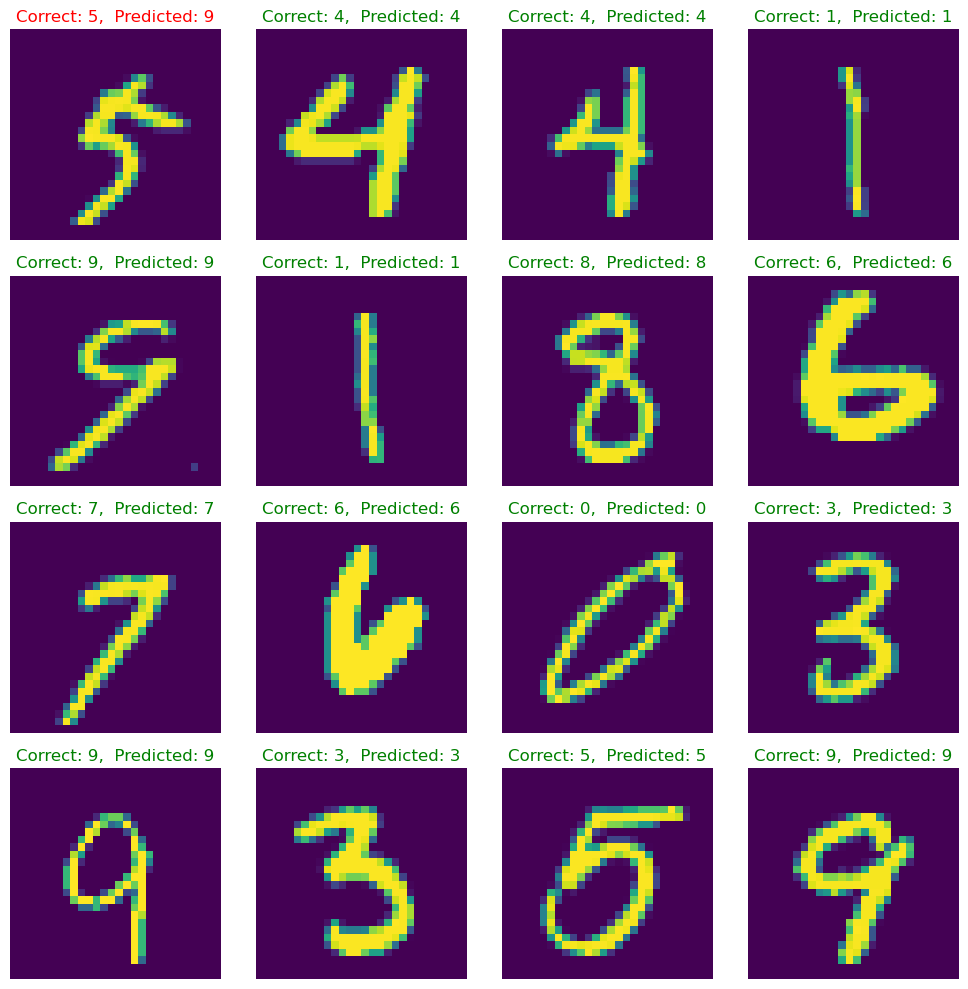

In [35]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        num = np.random.randint(0, 10000)
        ax[i, j].imshow(X_test[num])
        if y_pred[num] != y_test[num]:
            ax[i, j].set_title(f"Correct: {y_test[num]},  Predicted: {y_pred[num]}", color='red')
        else:
            ax[i, j].set_title(f"Correct: {y_test[num]},  Predicted: {y_pred[num]}", color='green')
        ax[i, j].axis('off')
plt.tight_layout()
plt.show()